In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


FILENAME = "act_bliz.csv"
Activision= pd.read_csv(FILENAME, na_values='N/A')
FILENAME = "ea.csv"
EA= pd.read_csv(FILENAME, na_values='N/A')
FILENAME = "microsoft.csv"
Microsoft= pd.read_csv(FILENAME, na_values='N/A')
FILENAME = "nintendo.csv"
Nintendo= pd.read_csv(FILENAME, na_values='N/A')
FILENAME = "take_two.csv"
Take_Two= pd.read_csv(FILENAME, na_values='N/A')
FILENAME = "tencent.csv"
Tencent= pd.read_csv(FILENAME, na_values='N/A')
FILENAME = "ubisoft.csv"
Ubisoft= pd.read_csv(FILENAME, na_values='N/A')
FILENAME = "zynga.csv"
Zynga= pd.read_csv(FILENAME, na_values='N/A')






In [22]:
Tencent.columns
Microsoft.columns
Nintendo.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')

In [5]:
Tencent.info

<bound method DataFrame.info of             Date    Open    High     Low   Close   Volume Currency
0     2010-01-04   4.366   4.416   4.366   4.416    61480      USD
1     2010-01-05   4.474   4.480   4.410   4.452    75690      USD
2     2010-01-06   4.480   4.482   4.470   4.482    56010      USD
3     2010-01-07   4.298   4.300   4.254   4.300    49355      USD
4     2010-01-08   4.290   4.360   4.290   4.358    25530      USD
...          ...     ...     ...     ...     ...      ...      ...
3185  2022-08-29  41.020  41.675  40.740  40.740  1977550      USD
3186  2022-08-30  40.750  40.990  39.600  40.025  4559448      USD
3187  2022-08-31  41.450  41.900  41.200  41.370  3960398      USD
3188  2022-09-01  41.250  41.374  40.710  41.240  3240642      USD
3189  2022-09-02  41.810  42.154  41.420  41.420  3294829      USD

[3190 rows x 7 columns]>

In [ ]:
## Normalize numeric features:
num_features = ['Open', 'High', 'Low', 'Close', 'Volume']
scaler = StandardScaler()

def standard(company):
    company[num_features] = scaler.fit_transform(company[num_features])
    company.sort_values('Date', ascending=False, inplace=True)
    return company
standard(Activision)
standard(EA)
standard(Microsoft)
standard(Nintendo)
standard(Take_Two)
standard(Tencent)
standard(Ubisoft)
standard(Zynga)




,Date,Open,High,Low,Close,Volume,Currency
2623,2022-05-20,1.190171,1.160188,1.166383,1.127448,13.205945,USD
2622,2022-05-19,1.215253,1.237737,1.239559,1.188530,1.591863,USD
2621,2022-05-18,1.183005,1.213062,1.243218,1.228053,0.712764,USD
2620,2022-05-17,1.175838,1.195438,1.199312,1.231646,2.133323,USD
2619,2022-05-16,1.014596,1.012142,1.067594,1.034029,1.004415,USD
...,...,...,...,...,...,...,...
4,2011-12-23,1.569987,1.526780,1.579831,1.562205,-0.969040,USD
3,2011-12-22,1.648817,1.590229,1.572513,1.590950,-0.948117,USD
2,2011-12-21,1.501907,1.562030,1.535925,1.590950,-0.816976,USD
1,2011-12-20,1.469658,1.495056,1.510313,1.508310,-0.609289,USD


In [ ]:
import matplotlib.pyplot as plt
xaxis_labels = set(Activision["Date"].str[:4])
xaxis_labels =list(xaxis_labels)
xaxis_labels = [int(d) for d in xaxis_labels]


print(sorted(xaxis_labels))

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


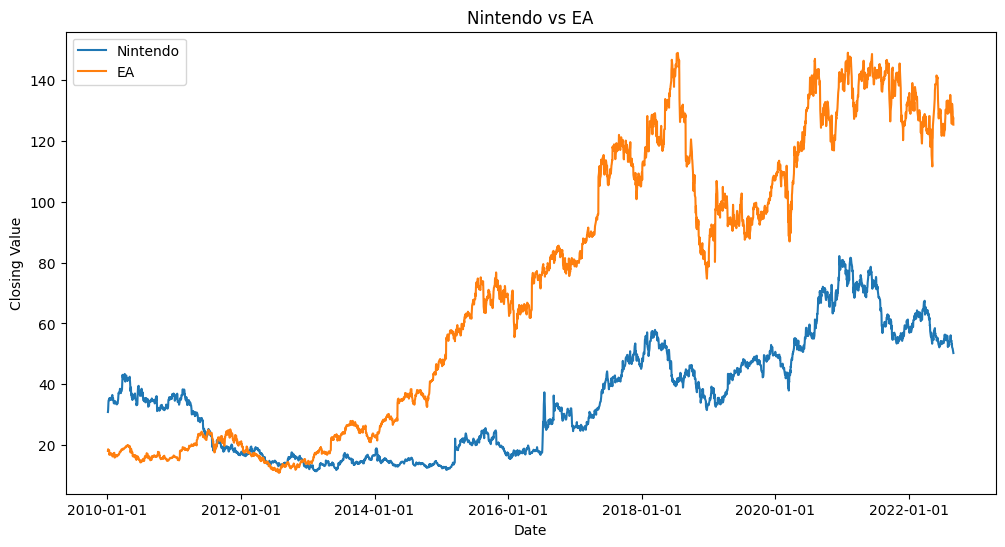

In [12]:



# Convert date string to matplotlib datetime format
Nintendo['Date'] = pd.to_datetime(Nintendo['Date'])
EA['Date'] = pd.to_datetime(EA['Date'])

# Define x and y data
xdata1 = Nintendo['Date']
ydata1 = Nintendo['Close']
xdata2 = EA['Date']
ydata2 = EA['Close']

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot data
ax.plot(xdata1, ydata1, color='tab:blue', label='Nintendo')
ax.plot(xdata2, ydata2, color='tab:orange', label='EA')

# Set x-axis formatter
date_fmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_fmt)

# Set axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Closing Value')
ax.set_title('Nintendo vs EA')

# Add legend
ax.legend()

plt.show()

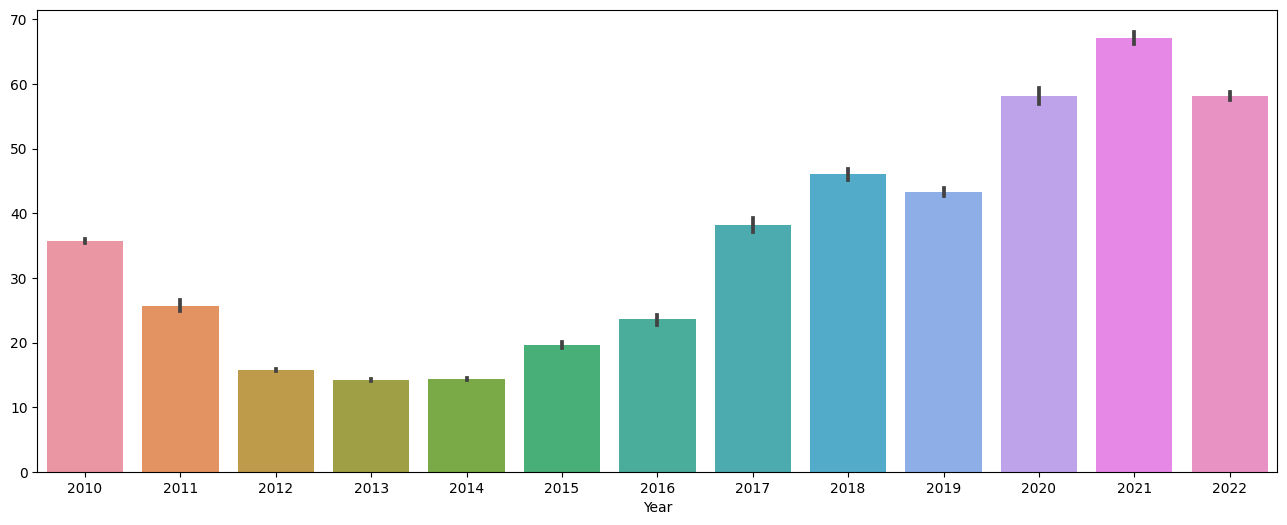

In [8]:
import matplotlib.ticker as plticker
#Nintendos closing stock value starting in 2010 through 2022
Nintendo['Year'] = pd.to_datetime(Nintendo['Date']).dt.year

xdata1 = Nintendo['Year'].values
ydata1 = Nintendo['Close'].values
plt.figure(figsize=(16, 6))
sns.barplot(x=xdata1, y=ydata1)
plt.xlabel("Year")

ax = plt.gca()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1))

plt.show()